# Manual

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import math

In [2]:
import sys
sys.path.append("C:/Users/ander/Documents/Handling/Kurs/Python/Eget/Bib/datagnome")
import datagnome as dgnom
from importlib import reload

In [3]:
reload(dgnom)

<module 'datagnome' from 'C:\\Users/ander/Documents/Handling/Kurs/Python/Eget/Bib/datagnome\\datagnome.py'>

## Data import

In [ ]:
path = "Data/Svamp/mushrooms.csv"
df = pd.read_csv(path)

In [ ]:
# Alt
urls = lambda i: f"data/carsales/{i}"
dfc = pd.read_csv(urls("norway_new_car_sales_by_model.csv"),encoding = "ansi")
dfm = pd.read_csv(urls("norway_new_car_sales_by_make.csv"),encoding = "ansi")

In [6]:
print(sns.get_dataset_names())
#df = sns.load_dataset("penguins")
df = sns.load_dataset("dots")
df2 = sns.load_dataset("titanic")

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


## Data preprocessing
### Merge datatables

`merge()`, ref. lathund_pandas

In [ ]:
# How {‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}, default ‘inner’
men0408 = men2004.merge(men2008,how="outer",on="Athlete", suffixes = ("_2004", "_2008"),indicator=True)

# With indicator = True
men0408.loc[men0408._merge == "both"].shape # Into inner join
men0408.loc[men0408._merge.isin(["both","left_only"])].shape # Into left join
men0408.loc[men0408._merge != "both"].shape # Into outer join without inner join

`concat()`, ref. lathund_pandas

In [ ]:
# Keys are used to differentiate rows on origin
pd.concat([men2004,men2008],ignore_index=False,keys=["Athens","Bejing"],axis=0,names=["city"])

### Data modification

In [ ]:
# Group by
dfexp= df.groupby("BoyOrGirl")["TestScore1"].agg(["mean","median","min","max"])
dfexp= df.groupby(["month","year"]).agg({"TestScore1":"mean","TestScore2":"max"}).reset_index()

In [ ]:
# New datetime column
dfexp["date"] = pd.to_datetime(dfexp['year'].astype(str)+"-"+dfexp['month'].astype(str), format='%Y-%m')

In [ ]:
# Get numerical columns
X = df.select_dtypes("number").copy()

In [ ]:
# Apply
hmerg = lambda r: r.PJME+r.PJMW if r.PJME >=0 else np.nan   
df.sort_index(inplace=True)
df.reset_index(drop=False,inplace=True)
df["PJM"] = df.apply(hmerg,axis=1)

In [ ]:
# Mapp with apply instead of map (to account for nan values)
def agetocat(x):
    if x == np.nan:
        return "unknown"
    elif x < 15:
        return "child"
    else:
        return "adult"

df["agecat"] = df.age.apply(agetocat)

In [ ]:
# Modify string
df["col_a"].str.upper()
df["col_a"].str.title()
df["col_a"].str.capitalize()
df["col_a"].str.replace(",","__")

df["col_a"].str.title().str.strip()

In [ ]:
# Rename columns
df.rename(columns={"Athlete Name":"Name"},inplace=True)

In [ ]:
# Split string
df[["city","state"]] = df["col_a"].str.split(",",expand=True)

In [ ]:
# Concatenate strings
df["city"].str.cat(df["state"],sep=", ")

In [ ]:
# Extraction of numbers from string
df["nr_1"] = df["col_b"].str.extract(r"(\d+)").astype("int")
#df["col_b"].astype("str").str.extract(r"(\d+)").astype("int") IF "col_b" is not formated as object

In [ ]:
# Remove unnecessary columns (implicit)
cols = ["species","island"] # "species"
dfut = df.drop(columns = cols)

In [ ]:
# Interpolate values
df.interpolate()
df.interpolate(method="linear",limit=2) # Linear interpolation, max 2 nans in a row are filled in
df.interpolate(method='polynomial', order=2)

In [ ]:
# Frequency conversion and resampling of df with datetime-like index

# Downsample with resample
temp.resample("D").first().round(2)
temp.resample("D").last().round(2)
temp.resample("D").mean().describe()
temp.resample("M",kind="timestamp").mean() # TImestamp: 2013-01-28
temp.resample("M",kind="period").mean() # Period: 2013-01

## Data cleaning

### Inspection

1. Data profiling
1. Visualization
1. Check usability
    1. Number of unique datapoints (account for balancing)
    1. Resolution

In [ ]:
df.head()
df.tail(5)
df.info()
df.describe(include="O")
df["align"].value_counts()

In [ ]:
#!pip install -U markupsafe
#!pip install -I markupsafe==2.0.1
#!pip install pandas_profiling
import pandas_profiling as pp
pp.ProfileReport(df)

In [114]:
num_feat, cont_feat, disc_feat, cat_feat = dgnom.create_feature_lists(df2)

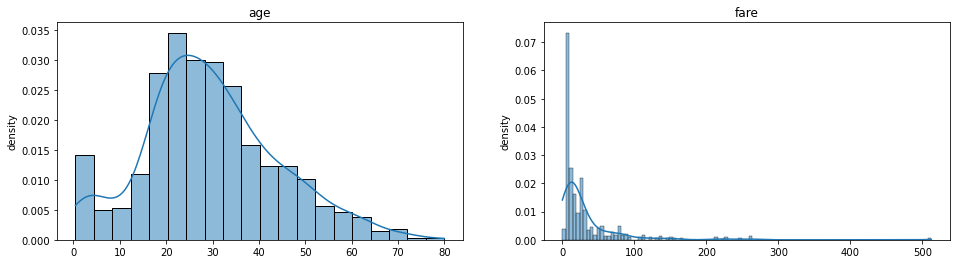

In [115]:
dgnom.df_cobahiscplots(df2,cont_feat,pltyp="histplot",target=False,hue=None,logs=False,kde=True,est=False,stat="density")

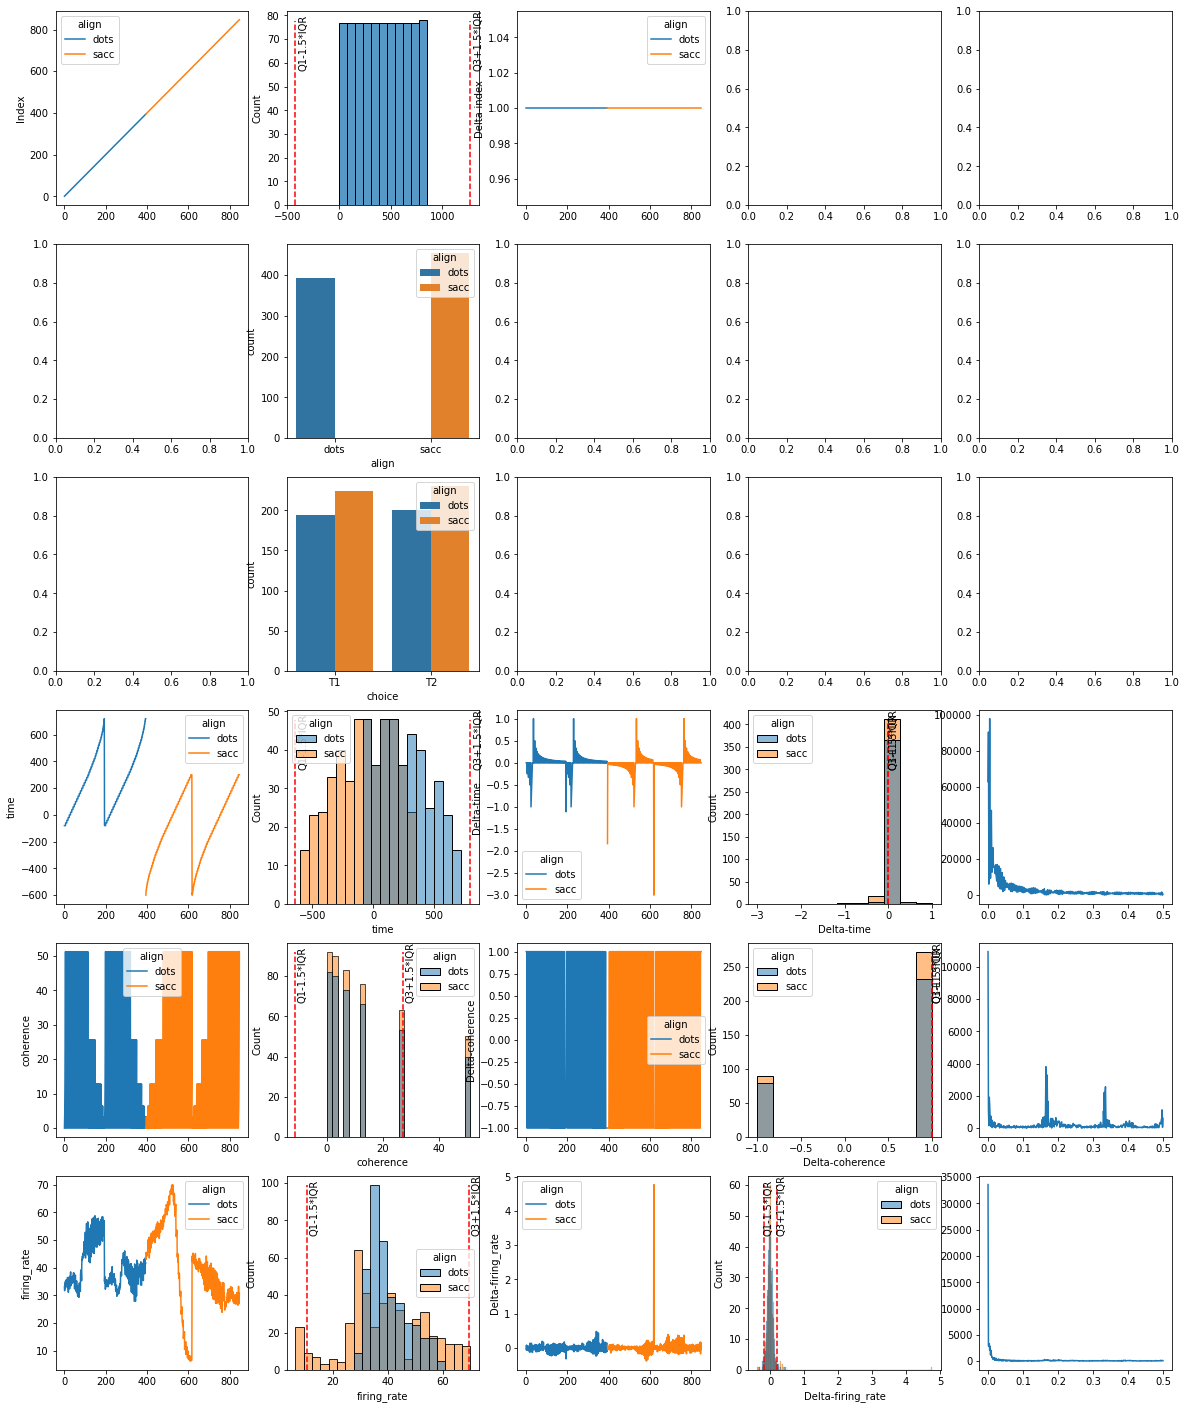

In [127]:
dgnom.df_metaplot(df,hue="align",diffrel=True)

### Check for inconsistent or invalid data

1. Check columns (in and between) for uniformity, consistency and validity
    1. Uniform use of units and definitions (start of week, timezone)
    1. Verify that no two items contradict each other
    1. Check / change Dtypes
    1. Check / change formating
        1. Regular expression patterns
    1. Check value range constraints (num columns)
    1. Check set-membership constraints (category columns)
        1. For example, a medla migth be gold, silver bronze 
        1. Example: smr.Medal=smr.Medal.replace(to_replace="Gold Medal",value = "Gold")
        1. Only allow one nan-value
    1. Validate complex non-categorical input
        1. Adresses, e-mail adresses, zip codes etc shall be real
        1. Regular expression
    1. Cross field validation
        1. If col A is the sum of col B and C: verify that this hold for all columns 

#### Plan

    Unnamed - Change name or remove
    
    monthly_fee - > 0, NumConC, EXTREMVÄRDE
    price_sold - remove kr => float, > 0, NumConC
    date_sold - remove "såld" => dates, NumConC
    price_pct_change - NumConC, EXTREMVÄRDE
    
    ALL - Nan
    
    CatNomC = check if unique before and after Title + strip
            check for unexpected values
    NumDisC = Whole numbers, expected range, max, min, distribution and std
            check for unexpected values
    NumConC = Whole numbers, expected range, max, min, distribution and std
            check for unexpected values
    Nan = Check for nan

#### Value constraints and set membership
Kolla format på t.ex. telefnnummer och epostadress

In [ ]:
# Modify column values
df.origin.replace("United States","usa",inplace=True)
df.Medal=df.Medal.replace(to_replace="Gold Medal",value = "Gold")

df.horsepower = df.horsepower.replace("Not available",np.nan)

In [ ]:
df.time = df.time.apply(lambda x: x if x<=200 else 200)

In [ ]:
# Rename columns
df.rename(columns={"Athlete Name":"Name"},inplace=True)

#### Check formating
Kolla format på t.ex. telefnnummer och epostadress

In [ ]:
# Simple modification
df.horsepower = df.horsepower.str.replace(" hp","").str.strip()

In [ ]:
# Regex email
pattern = r"[a-zA-Z0-9]+@[a-zA-Z0-9]+\.[a-z]+$"
df["res"] = df["col_1"].apply(lambda x: True if re.match(pattern,x) else False)

In [ ]:
# Other regex examples
df.area = df.area.str.replace(r"\W+"," ",regex=True).str.title()
df.sqm = df.sqm.str.replace(r"\s*sqm\s*","",regex=True).str.replace(",",".").astype("float")
df.price_sold = df.price_sold.str.replace(r"\s*kr\s*","",regex=True).astype("int")
df.date_sold = pd.to_datetime(df.date_sold.str.replace(r"\s*Såld\s*","",regex=True),format="%d %B %Y")

#### Change Dtypes

In [ ]:
df.Survived = df.Survived.astype("bool")  # bool, object, int, float ...
df.Fare = df.Fare.str.replace("$","",regex=False).astype("float")

titanic.Survived = pd.to_numeric(titanic.Survived)

In [ ]:
# Use str. for string manipulation
df.sqm = df.sqm.str.replace(r"\s*sqm\s*","",regex=True).str.replace(",",".").astype("float")

In [ ]:
# Datetime
df.date_sold = pd.to_datetime(df.date_sold.str.replace(r"\s*Såld\s*","",regex=True),format="%d %B %Y")

#### Cross field validation

In [ ]:
# Check numerical 
cond1 = df["time"]>=df["firing_rate"]
print(cond1.sum())
df.loc[cond1].index

<AxesSubplot:xlabel='align', ylabel='choice'>

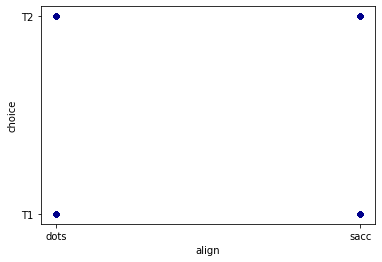

In [5]:
# Check mapping of one column over another
df.plot.scatter(x='align',y='choice',c='DarkBlue')

In [ ]:
# Alternative for checking mapping of one column over another - each unique row is counted separately
df2[["alive","survived"]].value_counts()

In [ ]:
# Modify by .replace
df.Medal=df.Medal.replace(to_replace="Gold Medal",value = "Gold")

# Modify / cretae colum by .map
dct = {1:"1st class",2:"2nd class",3:"3rd class"}
df["classes"] = df.col_1.map(dct)

#### Check rows for validity

1. Check rows for validity
    1. Unique constraints
        1. Check that all values in unique-only columns actually are unique
            1. Example: Datetime index for timehistory datasets
    1. Step constraints
        1. Always positive with increase in index?
        1. Always the same step?
            1. Example: Datetime index for timehistory datasets (h, min, d)
    1. Handle duplicates
    1. Handle missing rows

In [7]:
df.columns

Index(['align', 'choice', 'time', 'coherence', 'firing_rate'], dtype='object')

In [ ]:
# Count values
df.choice.value_counts()

In [20]:
# Check if unique
c = "time"
df[c].duplicated().sum()

781

In [ ]:
# Check step
plt.figure(figsize=(10,10))
ytmp = df[c].diff()
sns.lineplot(data=df, x=df.index, y=ytmp)
plt.show()

### Handle nan values
(or leave for next step)

In [ ]:
import missingno as msno
g = msno.matrix(df)

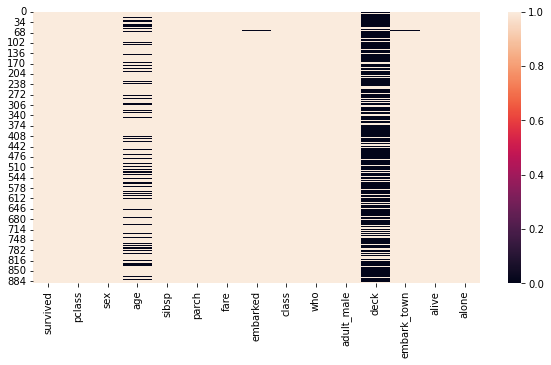

In [60]:
plt.figure(figsize=(10,5))
sns.heatmap(df2.notna())
plt.show()

In [ ]:
df.isna() # Show which cells are empty
df.isna().sum(axis=0)  # Sum  
df["time"].isna().sum()

In [ ]:
# Return rows with missing element, .any return rows = True
df.loc[df.isna().any(axis=1)]  # axis{0 or ‘index’, 1 or ‘columns’, None}, default 0

df.notna().all(axis=0)
df.isna().any(axis=0)

In [ ]:
# Remove nan-values
df.dropna()

In [ ]:
# Remove selected rows
df.drop(columns = "col_2") # Remove columns (implicit)
df.drop(labels = "col_2", axis = 1) # Remove columns (explicit)
df.drop(labels = [0,2], axis = 0) # Rows can be dropped by changing the axis to 0
df.dropna(axis=0,how="any") # ‘any’ : If any NA values are present, drop that row or column.
df.dropna(axis=0,how="all") # ‘all’ : If all values are NA, drop that row or column.
df.dropna(axis=0,subset=["Survived","Class","Gender","Age"],how="any")

In [ ]:
# Fill in missing values
df.col_2.fillna(df.col_2.mean()) # Mean value of column
df.fillna(method="ffill") # ffill: propagate last valid observation forward to next valid backfill

# If colmn dtype is category new items not already present must be added before using .fillna
df2["deck"] = df2["deck"].cat.add_categories("Unknown")
df2["deck"] = df2["deck"].fillna("Unknown")

### Handle duplicates

In [ ]:
df.loc[df.duplicated(keep=False)]
df.loc[df.duplicated(keep=False,subset=["align","firing_rate"])] # Only check selected columns
df.loc[df.duplicated(keep="first")].index # Get only the index of the duplicates (keep = first)

In [ ]:
any(df.duplicated())

In [ ]:
dr = df.duplicated(keep="first").sum() # All columns included in check

if dr>0:
    print(f"The dataset has {dr} duplicated rows.")
    print(f"Removing all duplicates will reduce the dataset from {df.shape[0]} to {df.shape[0]-dr} rows")
    print(df[df.duplicated()])
else:
    print("The dataset has 0 duplicated rows")
    
print("\n")
for c in df.columns:
    dup = df[c].duplicated().sum()
    if dup > 0:
        print(f"Columns {c} has {dup} duplicated rows")

if dr>0:
    print("Duplicated rows:")
    df.loc[df.duplicated(keep=False)]

In [ ]:
# Drop selected index
df.drop(index = [2069, 12253, 15596, 21833, 28678, 29790],inplace=True)

rbort = [i for i,v in df.Datetime.duplicated().iteritems() if v]
df.drop(rbort)

### Handle outliers

1. Check IQR and distribution
1. If cyclic data: replace outliers with average values

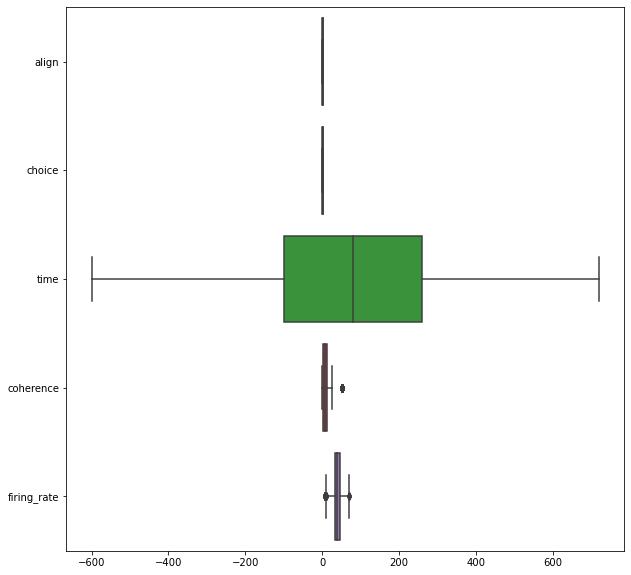

In [18]:
plt.figure(figsize=(10,10))
g = sns.boxplot(data=dgnom.df_allcatnum(df),orient="h")
#g = sns.catplot(data=df_allcatnum(df), kind="violin",orient="h")
plt.show()

In [ ]:
# Identify
titanic.describe()
titanic.loc[titanic.Age>90]
titanic.Fare.nlargest(10)
titanic.Fare.nsmallest(10)
titanic.Fare.idxmax()

c="time"
q1 = df[c].quantile(.25)
q3 = df[c].quantile(.75)
df[c].between(q1-1.5*(q3-q1),q3+1.5*(q3-q1)).sum()

In [ ]:
# Replace
titanic.loc[217,"Age"] = 42

# Drop
df.drop(labels = [0,2], axis = 0) # Rows can be dropped by changing the axis to 0

### Making data usefull

1. Making data usefull
    1. Removing irrelevant data
    1. Balance data (if necessary)

In [53]:
# Remove unnecessary columns (implicit)
cols = ["species","island"] # "species"
dfut = df.drop(columns = cols)

In [ ]:
# Balance data
col = "sex"
dfut = dgnom.df_downsample(dfut,col)  #dfut.dropna()

In [ ]:
# Reseet index
df.reset_index(drop=True,inplace=True)

## EDA

1. Description
1. Evaluate interdependence between columns
1. Correlation between columns

In [7]:
def amplt(df,var_list,xvar,kolm = 3):
    """Plot categorys"""
    rows = math.ceil(len(var_list)/kolm)
    fig, axs = plt.subplots(rows, kolm, figsize=(20,5*rows))

    for i, ax in zip(var_list,axs.flat):
        g = sns.barplot(data=df,x=xvar,y=i,ax=ax)
        ax.set(xlabel="",ylabel="",title=i)
        
    for i in axs.flat[::-1][:rows*3-len(var_list)]:
        i.set_axis_off()
    plt.show()

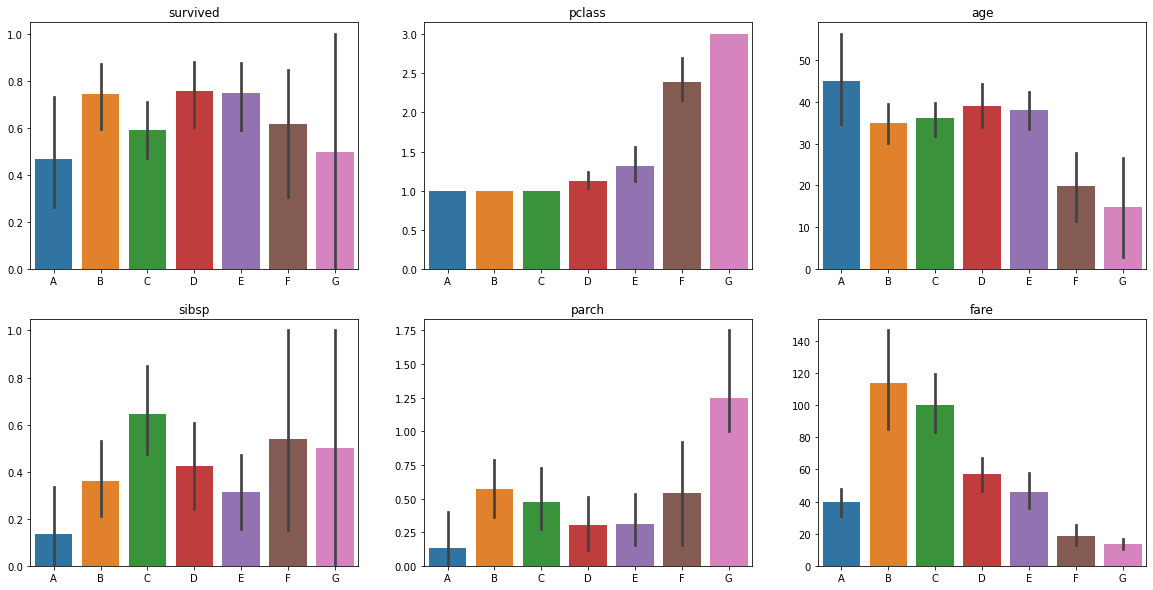

In [18]:
cols = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
xvar = "deck"
amplt(df2,cols,xvar,kolm = 3)

In [ ]:
df.groupby("yr_sold").sek_sqm.mean().plot()

<function matplotlib.pyplot.show(close=None, block=None)>

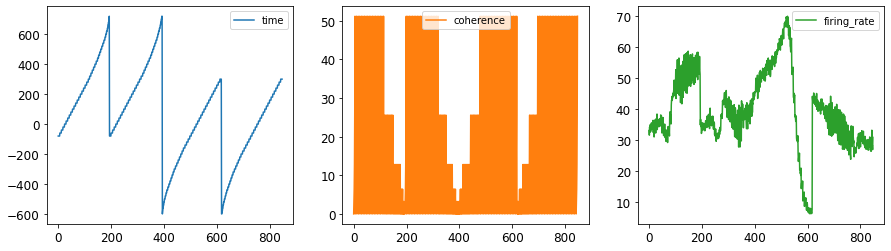

In [36]:
df.plot(figsize=[15,4],fontsize=12, subplots=True, layout=(1,3),kind="line") # kind="hist"
plt.show

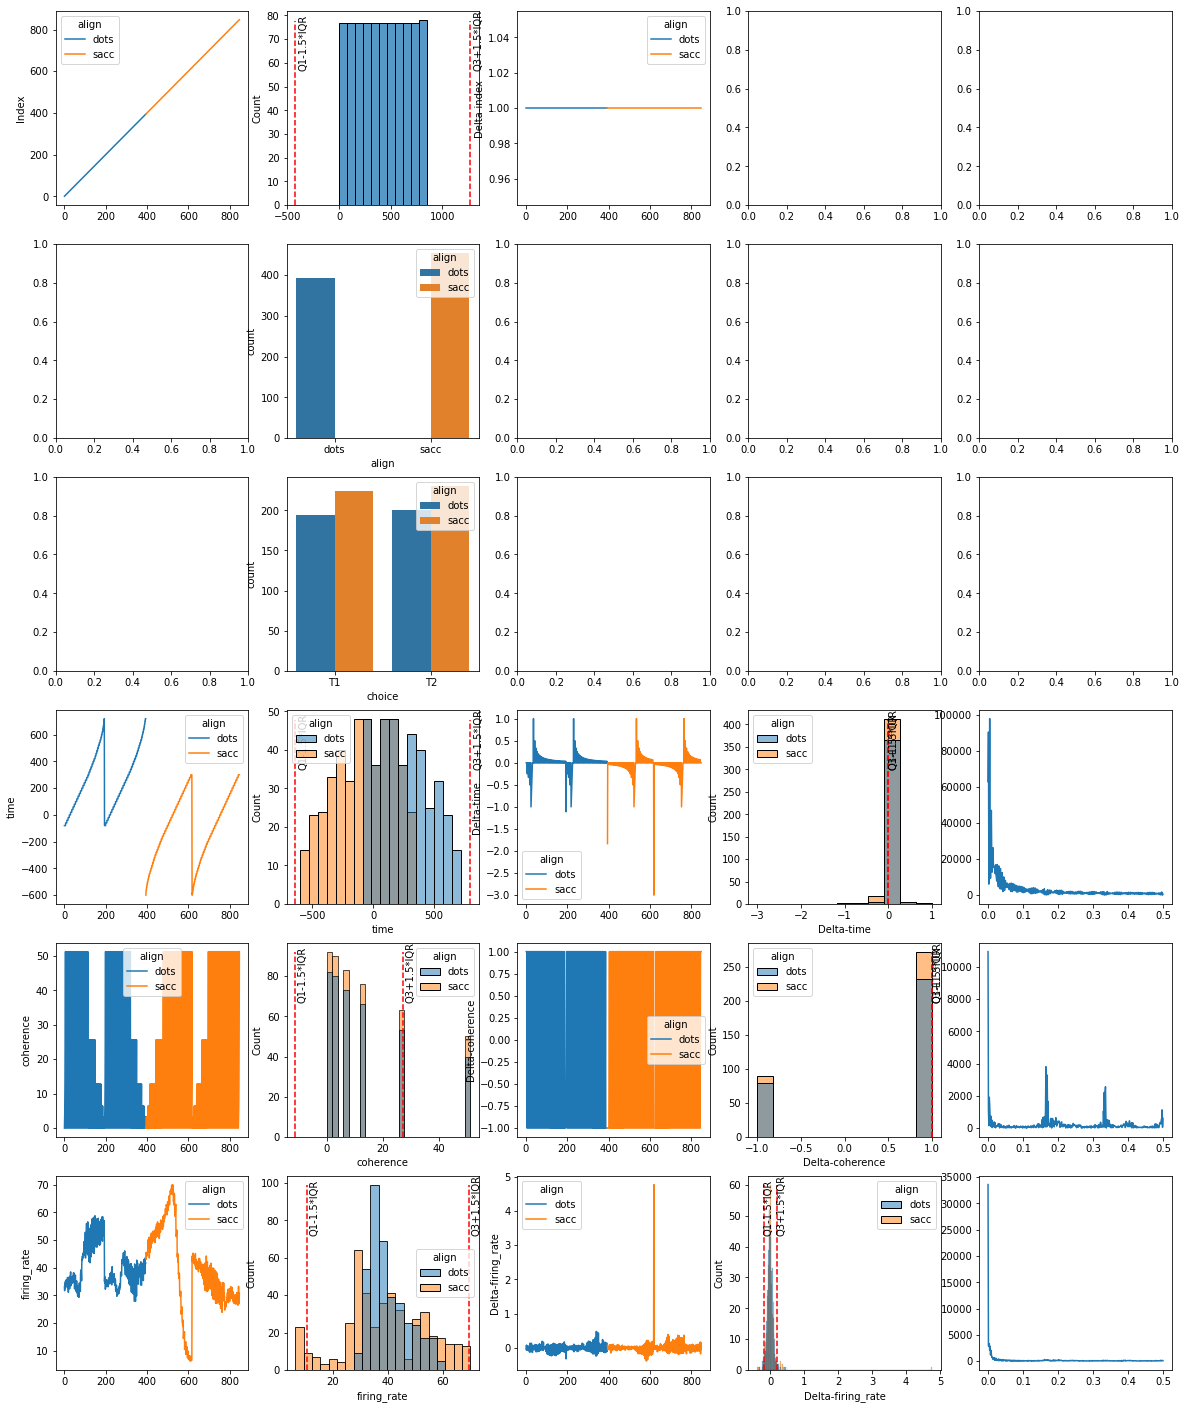

In [126]:
dgnom.df_metaplot(df,hue="align",diffrel=True)

In [12]:
num_feat, cont_feat, disc_feat, cat_feat = dgnom.create_feature_lists(df2)

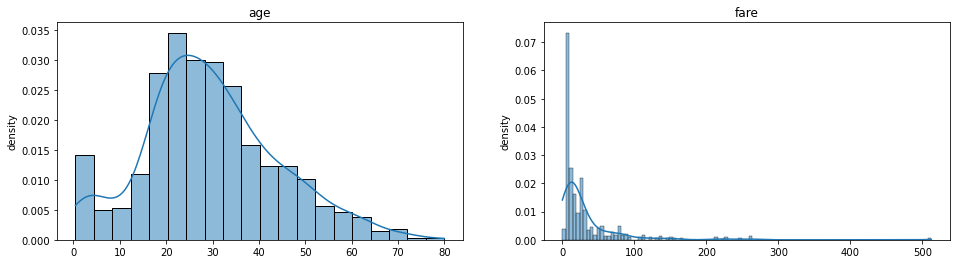

In [27]:
dgnom.df_cobahiscplots(df2,cont_feat,pltyp="histplot",target=False,hue=None,logs=False,kde=True,est=False,stat="density")

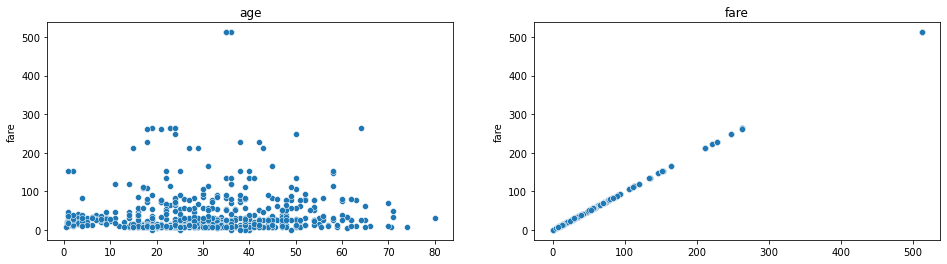

In [28]:
dgnom.df_cobahiscplots(df2,cont_feat,pltyp="scatterplot",target="fare",hue=None,logs=False,kde=True,est=False,stat="density")

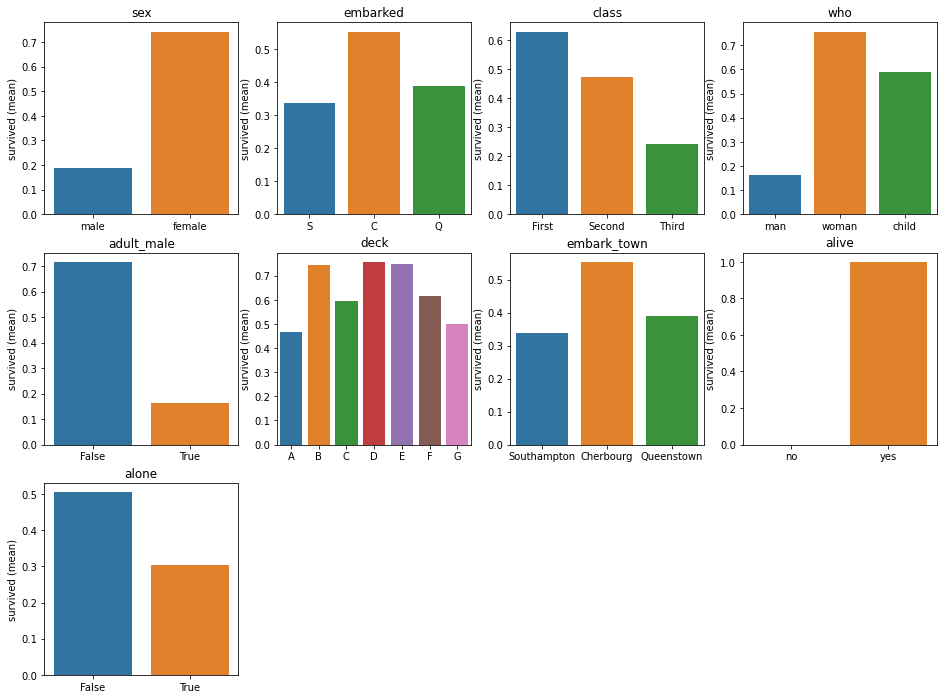

In [29]:
dgnom.df_cobahiscplots(df2,cat_feat,pltyp="barplot",target="survived",hue=None,logs=False,kde=True,est=False,stat="density")

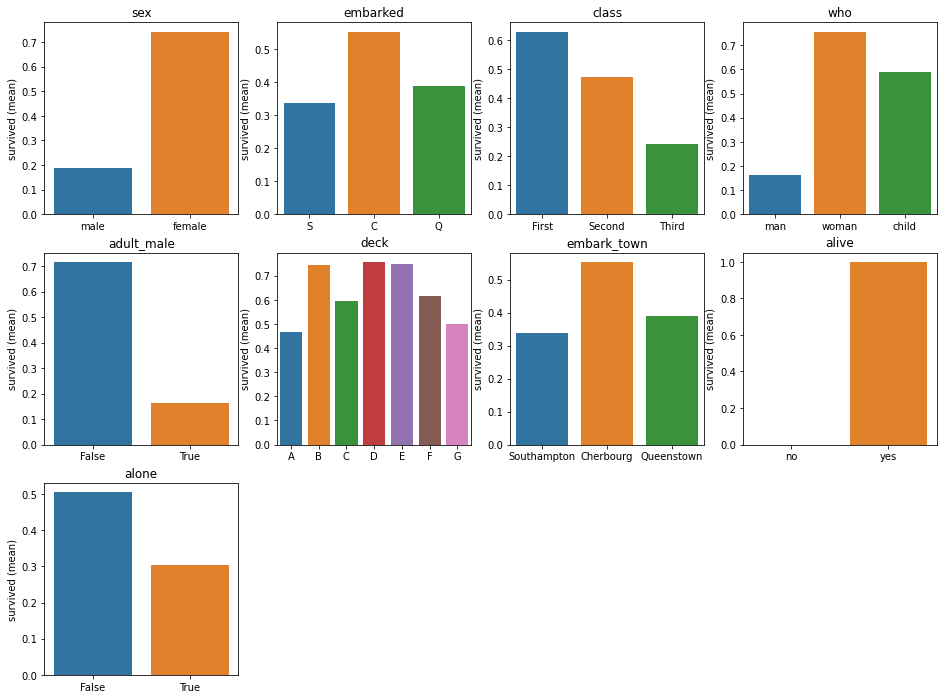

In [30]:
dgnom.df_cobahiscplots(df2,cat_feat,pltyp="barplot",target="survived",hue=None,logs=False,kde=True,est=np.mean,stat="density")

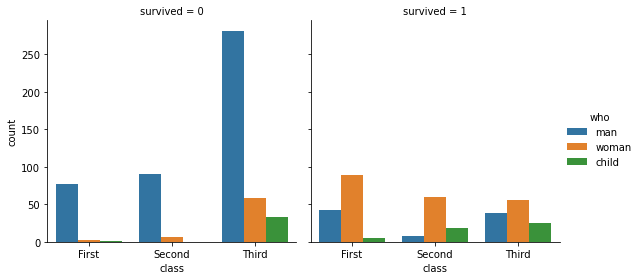

In [183]:
# use catplot to draw plot-grids
sns.catplot(x="class", hue="who", col="survived",data=df2, kind="count",height=4, aspect=1);

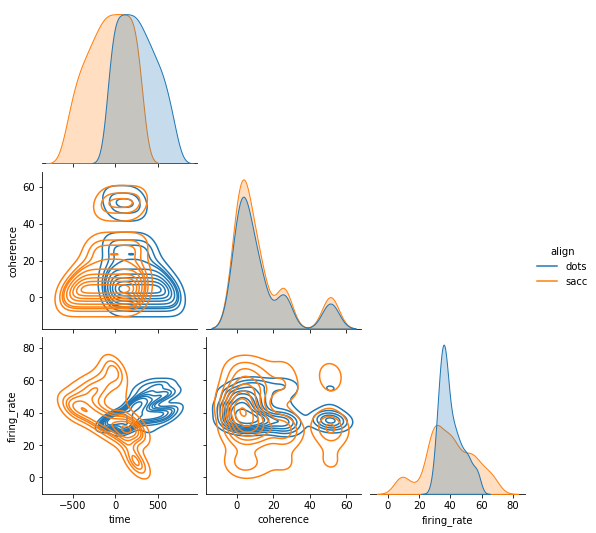

In [45]:
#sns.pairplot(df, hue="align", diag_kind="hist")
#sns.pairplot(df, hue="align", kind="kde")
sns.pairplot(df, hue="align", markers=["o", "s"], corner=True, kind="kde")
plt.show()

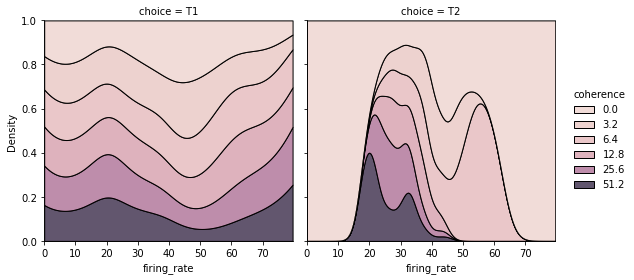

In [58]:
sns.displot(data=df,x="firing_rate", hue="coherence",
    kind="kde", height=4,
    multiple="fill", clip=(0, None),col="choice"
)
plt.show()

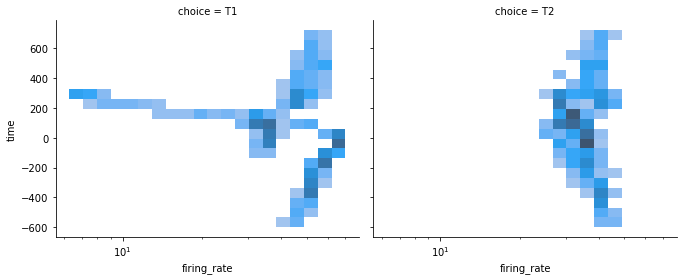

In [59]:
sns.displot(data=df,x="firing_rate",y="time",col="choice",kind="hist",
  height=4,aspect=1.2,log_scale=(10,0),bins=20
)
plt.show()

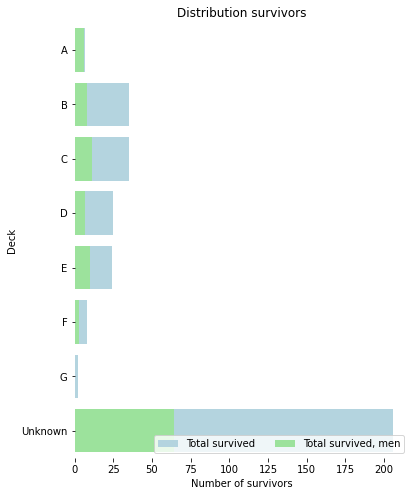

In [112]:
# Rotate barplot by assigning category to y-axis and numerical to x-axis

#df2["deck"] = df2["deck"].cat.add_categories("Unknown")
#df2["deck"] = df2["deck"].fillna("Unknown")

f, ax = plt.subplots(figsize=(6, 8))

sns.barplot(data=df2, x="survived", y="deck", ci=None, label="Total survived", estimator=sum, color="lightblue")
sns.barplot(data=df2.loc[df2["sex"]=="male",:], x="survived", y="deck", ci=None, label="Total survived, men", estimator=sum, color="lightgreen")

ax.set(xlabel="Number of survivors",ylabel="Deck",title="Distribution survivors")
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)
plt.show()

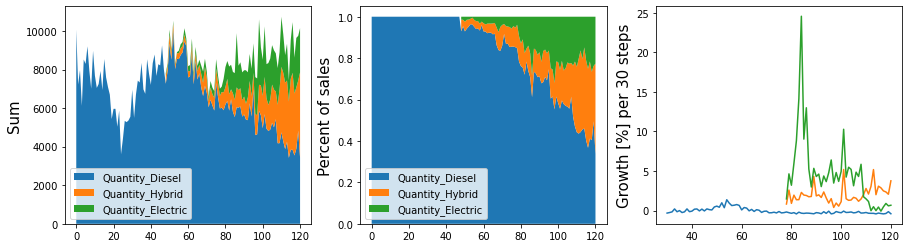

In [196]:
dgnom.df_numdevplot(df=df,col=["Quantity_Diesel","Quantity_Hybrid","Quantity_Electric"],step=30)

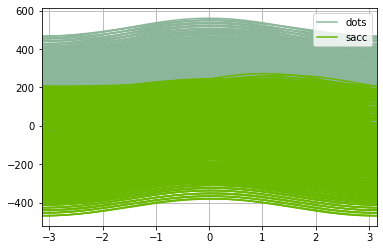

In [4]:
# Andre plot takes target category + numerical columns
from pandas.plotting import andrews_curves

plt.figure()
cols = [c for c in df.columns if df[c].dtype != "O"]+ ["align"]
andrews_curves(df[cols], "align");

In [21]:
dgnom.df_flexplot(df)

interactive(children=(IntSlider(value=6, description='dx', max=15, min=3), IntSlider(value=5, description='dy'…

<Figure size 432x360 with 0 Axes>

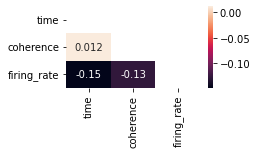

In [24]:
dgnom.df_corrbas(df,col=False,method="pearson")

interval columns not set, guessing: ['time', 'coherence', 'firing_rate']


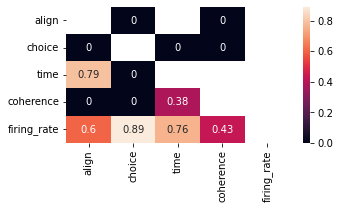

In [25]:
dgnom.df_corrphik(df,col=False)

## Data export

### Save and import data

In [ ]:
df.loc[:,["Datetime","PJM"]].to_csv('proc_hour.csv',index = False)

In [ ]:
# Check export
dfny = pd.read_csv("proc_hour.csv")
dfny.info()

# Resource library
## Checklist

1. <font color=darkblue>__Syftet med analys__</font>
    1. Hur skapas värde och för vem
        1. Nyttofunktion
        1. Kostnadsfunktion
    1. Vad vill vi uppnå
        1. Hur ser slutprodukten ut
        1. Definition av framgång (ange kriterier)
        1. Definition av misslyckande (ange kriterier)
1. <font color=darkblue>__Förstå datan__</font>
    1. Inspektera kort
    1. Är datan tillräcklig informationsrik för att motivera vidare arbete
        1. Storlek, upplösning
        1. Noggranhhet och precision relativt vad som skall mätas
    1. Går det att bedömma datans noggrannhet
    1. Går det att bedömma om datan är representativ?
    1. Innebörd av och enhet på samtliga kolumner
    1. Klargör definition av enheter
        1. Ex: Definition av vecka (start måndag, start söndag) kan variera
        1. Ex: Tidszon för lokal tid
    1. Är datan enhetlig och internt konsistent
        1. Enhetlig användning av enheter och definitioner
            1. Enheter, tidszon, start på vecka
        1. Datan är bara konsistent om inga två artiklar motsäger varandra
    1. Är formatering och värden giltiga?
        1. Formatering och datatyp rätt?
        1. Är all artiklar inom förväntade gränser eller i förväntade kategorier
        1. Är adresser, epostadresser personnummer m.m. verkliga?
    1. Hur har insamling av data gått till
    1. Hur har datan bearbetats efter insamling
    1. Vilka externa händelser kan ha haft inverkan på datan
        1. Allting har en historia
        1. Insamlingsrelaterade händelser
            1. Ändring i insamlingsmetodik
            1. Områden, definitioner m.m.
        1. Yttre händelser
            1. Policyförändringar
    1. Är den lämplig för användning
        1. Bör den modifieras innan användning
        1. Bör extern data läggas till
            1. Veckodagar, heldagar, semester för tidshistorier?
        1. Finns det onödig data som bör tas bort?
        1. Är den korrekt formaterad
1. <font color=darkblue>__Färdplan__</font>
    1. Vilka problem måste lösas
    1. Konceptlösningar
    1. Färdplan
1. <font color=darkblue>__Data cleaning__</font>
    1. Merge dataset and enhance dataser
        1. Merge datatables
        1. Split columns, agreggate, group-by etc.
        1. Add external data (day of week)
    1. Train test split
        1. Cyclic or non-cyclic data
    1. Inspection
        1. Data profiling
        1. Visualization
        1. Check usability
            1. Number of unique datapoints (account for balancing)
            1. Resolution
    1. Check columns (in and between) for uniformity, consistency and validity
        1. Uniform use of units and definitions (start of week, timezone)
        1. Verify that no two items contradict each other
        1. Check / change Dtypes
        1. Check / change formating
            1. Regular expression patterns
        1. Check value range constraints (num columns)
        1. Check set-membership constraints (category columns)
            1. For example, a medla migth be gold, silver bronze 
            1. Example: smr.Medal=smr.Medal.replace(to_replace="Gold Medal",value = "Gold")
            1. Only allow one nan-value
        1. Validate complex non-categorical input
            1. Adresses, e-mail adresses, zip codes etc shall be real
            1. Regular expression
        1. Cross field validation
            1. If col A is the sum of col B and C: verify that this hold for all columns 
    1. Check rows for validity
        1. Unique constraints
            1. Check that all values in unique-only columns actually are unique
                1. Example: Datetime index for timehistory datasets
        1. Step constraints
            1. Always positive with increase in index?
            1. Always the same step?
                1. Example: Datetime index for timehistory datasets (h, min, d)
        1. Handle duplicates
        1. Handle missing rows
    1. Handle nan values (or leave for next step)
    1. Error handling
        1. Check distribution of number of decimals
        1. Check distribution of decimal digits
        1. Check distribution of values and meta-values (diff (=resolution), diff moving average, moving average, derivate of moving average, 
        1. Handle outliers
            1. Check IQR and distribution
            1. If cyclic data: replace outliers with average values
    1. Making data usefull
        1. Removing irrelevant data
        1. Balance data (if necessary)
1. <font color=darkblue>__EDA__</font>
    1. Description
    1. Evaluate interdependence between columns
    1. Correlation between columns
1. <font color=darkblue>__Data export__</font>

## Python Libraries

Often
- Missingno

Sometimes
- Fty: for processing text into readable text (â€œquoteâ€\x9d = "quote")
- Scrubadub: for eliminating personally identifiable information (PII) from free text
- Arrow: formating of dates and times

TBA
- Datacleaner
- Dora
- Dabl: Data exploration

## Code examples

## Problems-solutions

Autocluster function for EDA:
> Lösning

Save graphs to file
> Lösning 2

Time history graph with built in group by (make inte months, days, years etc)
> Lösning 2

How to keep track of changes (removed nan, removed duplicates etc.)
> Lösning

## Litterature

https://en.wikipedia.org/wiki/Data_cleansing#Data_quality

https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4

## Inspiration

Tableau

Qlik Sense

# Definitions

__Accuracy__ is how close or far off a given set of measurements (observations or readings) are to their true value.

__Precision__ is how close or dispersed the measurements are to each other. 

# References

# Notes

__Validity__: Skriv test-funktioner som komplement till .describe. Cross-field validation särksilt intressant. Fler regler (syntaxfel, enhetlig formatering av strängar, rätt datumformat (tidzon, start på vecka), m.m.). NOTERA att giltigheten måste kontrolleras igenom om datan har modifierats (t.ex. genom att fylla i saknade värden)

__Accuracy__: 1) Kolla extremvärden, 2) Kolla efter värden som sticker ut m.a.p. avrundning

__Övrigt__: Lista värden med samma betydelse (Nan, 0, saknas)